# **Feature Engineering Notebook**

## Objectives

* Engineer features for regression model

## Inputs

* outputs/datasets/cleaned/TestSetCleaned.csv
* outputs/datasets/cleaned/TrainSetCleaned.csv

## Outputs
 
* Generate a list with variables to engineer

---

# Change working directory

Accessing the current directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues/jupyter_notebooks'

Making sure working in the child of the workspace directory

In [2]:
os.chdir('/workspaces/milestone-project-heritage-housing-issues')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues'

---

# Load Cleaned Data

* Train Set

In [4]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head()

,FirFlrSF,SecFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0,3,3,48,1,1774,774,1,2007,...,11694,90,452,108,5,9,1822,2007,2007,314813
1,894,0,2,1,0,1,894,308,1,1979,...,6600,60,0,0,5,5,894,1962,1962,109500
2,964,0,2,1,713,5,163,432,1,1979,...,13360,80,0,0,7,5,876,1921,2006,163500
3,1689,0,3,1,1218,6,350,857,2,2002,...,13265,70,148,59,5,8,1568,2002,2002,271000
4,1541,0,3,1,0,1,1541,843,2,2001,...,13704,118,150,81,5,7,1541,2001,2002,205000


* Test Set

In [5]:
test_set_path = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set_path)
TestSet.head()

,FirFlrSF,SecFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,2515,0,4,1,1219,4,816,484,1,1979,...,32668,70,0,0,3,6,2035,1957,1975,200624
1,958,620,3,1,403,3,238,240,1,1979,...,9490,79,0,0,7,6,806,1941,1950,133000
2,979,224,3,1,185,2,524,352,1,1979,...,7015,70,161,0,4,5,709,1950,1950,110000
3,1156,866,4,1,392,3,768,505,3,1979,...,10005,83,299,117,5,7,1160,1977,1977,192000
4,525,0,3,1,0,1,525,264,1,1979,...,1680,21,381,0,5,6,525,1971,1971,88000


---

# Data Exploration 

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation and PPS Analysis

### Spearman Correlation

* Train Set

In [8]:
df_spearman_train = TrainSet.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_spearman_train

OverallQual    0.802395
GrLivArea      0.732180
KitchenQual    0.667671
GarageArea     0.663543
YearBuilt      0.646465
Name: SalePrice, dtype: float64

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_corr(df, threshold, figsize, font_annot):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()

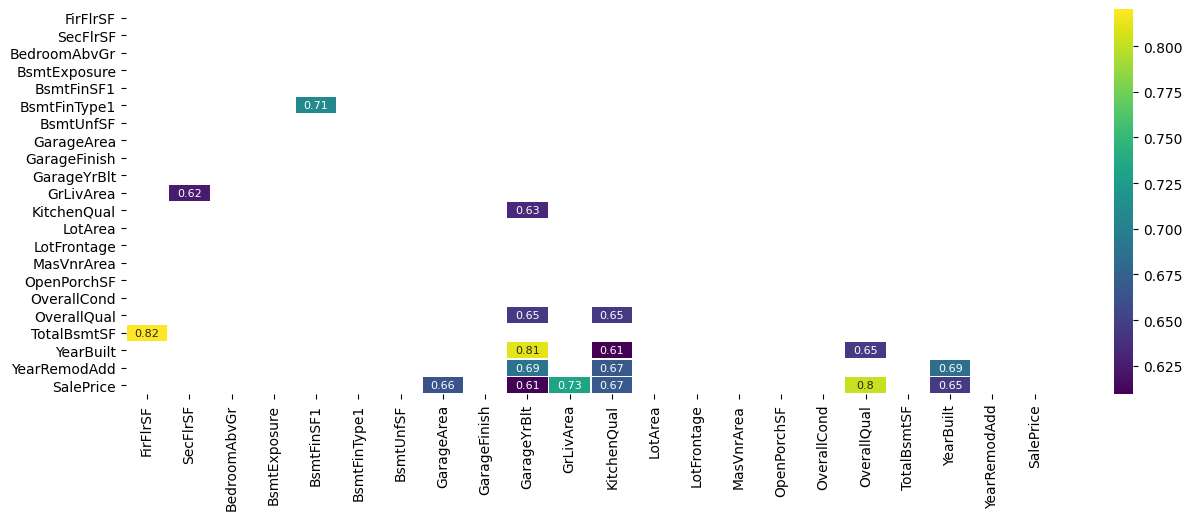

In [10]:
df_spearman_heat_train = TrainSet.corr(method='spearman')
heatmap_corr(df=df_spearman_heat_train, threshold=0.6, figsize=(15, 5), font_annot=8)

* Test Set

In [11]:
df_spearman_test = TestSet.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_spearman_test

OverallQual    0.837577
GrLivArea      0.727553
KitchenQual    0.696274
YearBuilt      0.680388
GarageYrBlt    0.644547
Name: SalePrice, dtype: float64

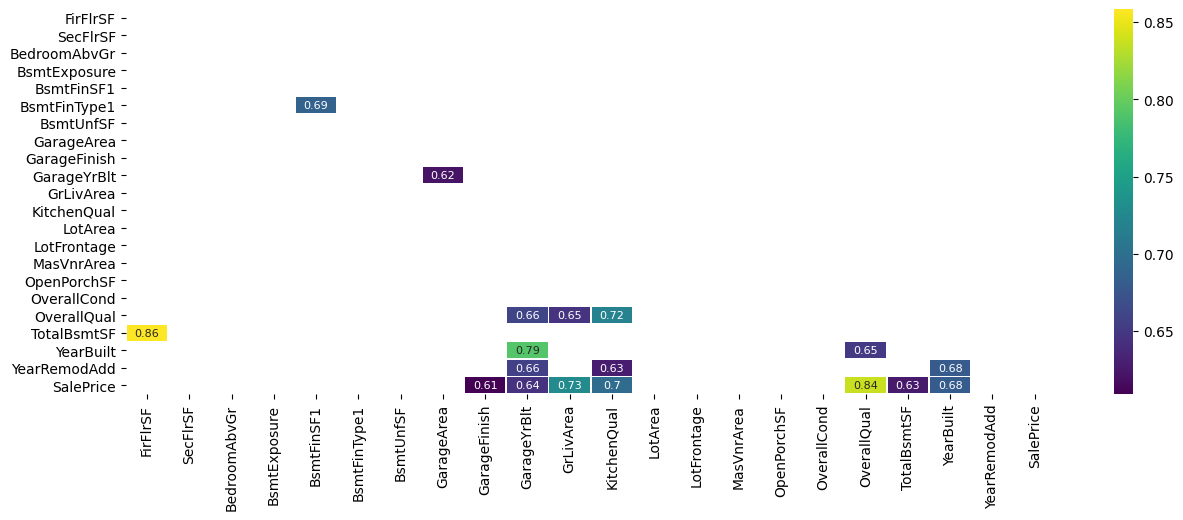

In [12]:
df_spearman_heat_test = TestSet.corr(method='spearman')
heatmap_corr(df=df_spearman_heat_test, threshold=0.6, figsize=(15, 5), font_annot=8)

### Pearson Correlation

* Train Set

In [13]:
df_pearson_train = TrainSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_pearson_train

OverallQual    0.790636
GrLivArea      0.721707
KitchenQual    0.655542
GarageArea     0.646603
TotalBsmtSF    0.635535
Name: SalePrice, dtype: float64

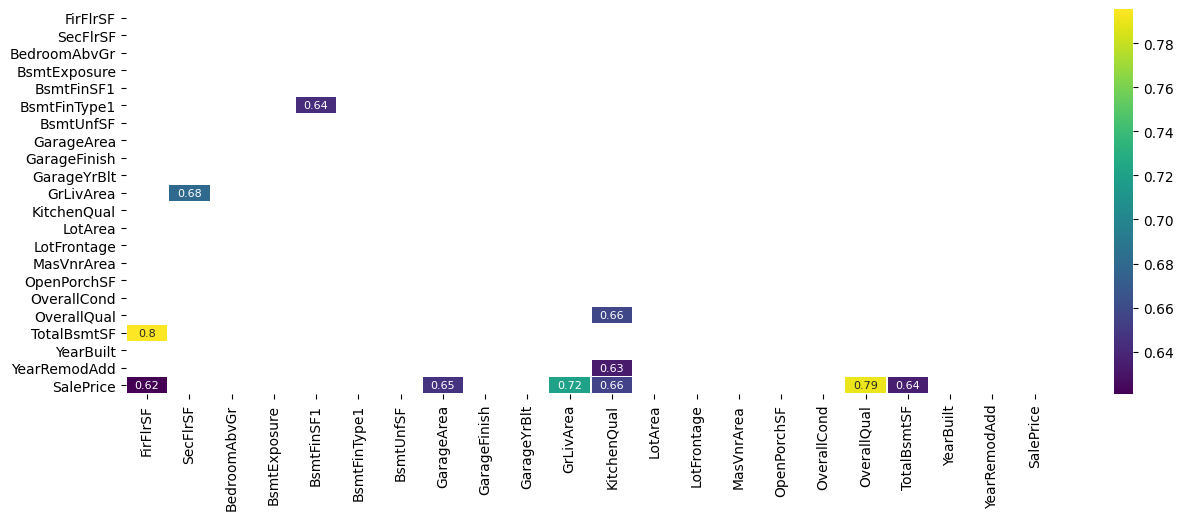

In [14]:
df_pearson_heat_train = TrainSet.corr(method='pearson')
heatmap_corr(df=df_pearson_heat_train, threshold=0.6, figsize=(15, 5), font_annot=8)

* Test Set

In [15]:
df_pearson_test = TestSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head()
df_pearson_test

OverallQual    0.792621
KitchenQual    0.676426
GrLivArea      0.665093
FirFlrSF       0.559870
TotalBsmtSF    0.558510
Name: SalePrice, dtype: float64

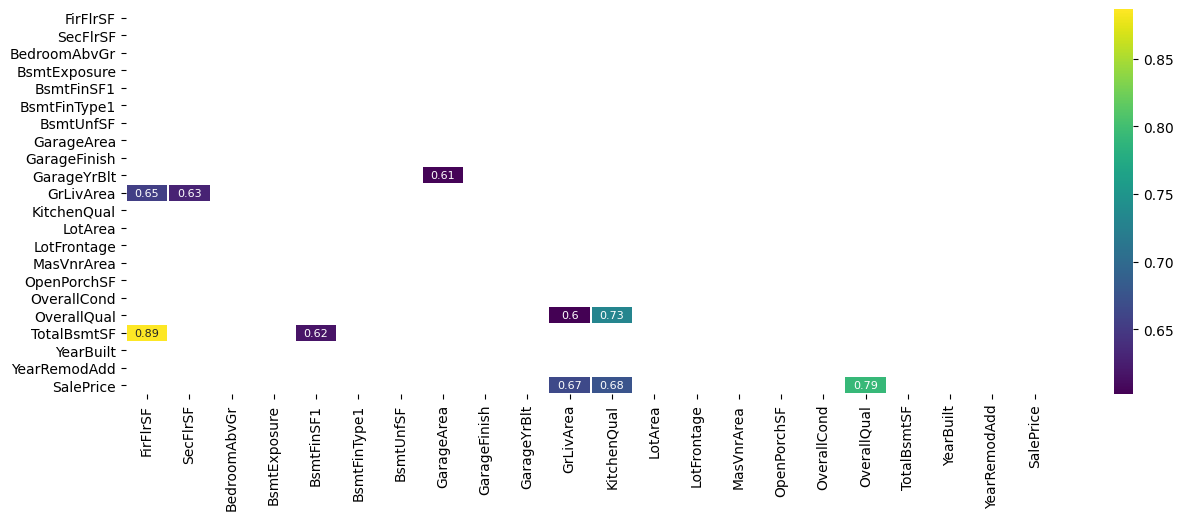

In [16]:
df_pearson_heat_test = TestSet.corr(method='pearson')
heatmap_corr(df=df_pearson_heat_test, threshold=0.6, figsize=(15, 5), font_annot=8)

* Top correlated attributes, to SalePrice

In [17]:
set(df_pearson_train[:].index.to_list() + df_pearson_test[:].index.to_list() 
                                        + df_spearman_train[:].index.to_list() 
                                        + df_spearman_test[:].index.to_list())

{'FirFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

I will focus on these variables and drop the others due to weaker correlation

In [ ]:
TrainSet.drop(columns=['SecFlrSF', 'BedroomAbvGr', 'BsmtExposure',
                    'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF',
                    'GarageFinish', 'LotArea', 'LotFrontage',
                    'MasVnrArea', 'OpenPorchSF', 'OverallCond',
                    'YearRemodAdd'], inplace=True)

In [ ]:
TestSet.drop(columns=['SecFlrSF', 'BedroomAbvGr', 'BsmtExposure',
                    'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF',
                    'GarageFinish', 'LotArea', 'LotFrontage',
                    'MasVnrArea', 'OpenPorchSF', 'OverallCond',
                    'YearRemodAdd'], inplace=True)